In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day33-handling-mixed-variables/titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [ ]:
# the number means that the passanger was traveling with how many people

In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger Traveling with')

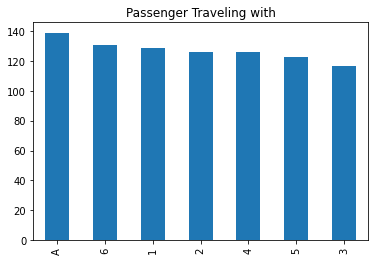

In [6]:
fig = df['number'].value_counts().plot(kind = 'bar')
fig.set_title('Passenger Traveling with')

In [7]:
# extract numerical part
df['numerical_number'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')



In [8]:
df['categorical_number'] = np.where(df['numerical_number'].isnull(),df['number'],np.nan)



In [9]:
df.head()

,Cabin,Ticket,number,Survived,numerical_number,categorical_number
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
